15
depth [173.   167.   152.   137.   122.   107.    92.    79.75  77.    62.
  47.    32.    17.     2.     0.  ]
relative depth [1.    0.965 0.879 0.792 0.705 0.618 0.532 0.461 0.445 0.358 0.272 0.185
 0.098 0.012 0.   ]
15
15
slope 0.39437940710747893
1/slope 2.5356293507674788
Ap_p= 1.23
k= 183.0
p1 [1.         0.98234414 0.93755    0.88994382 0.83964278 0.78612976
 0.7293833  0.67896981 0.6670832  0.59833101 0.52153619 0.43011626
 0.31304952 0.10954451 0.        ]
p2 [0.    0.035 0.121 0.208 0.295 0.382 0.468 0.539 0.555 0.642 0.728 0.815
 0.902 0.988 1.   ]
p3 [0.         0.26159366 0.42964934 0.53361169 0.6136614  0.68049564
 0.73807134 0.78097208 0.79016392 0.8375563  0.8807498  0.92143148
 0.95958315 0.99518261 1.        ]
Ap= [0.    0.597 0.936 1.104 1.197 1.243 1.251 1.232 1.225 1.165 1.068 0.921
 0.698 0.253 0.   ]
sediment area [  0.   109.   170.9  201.57 218.55 226.95 228.41 224.94 223.66 212.71
 195.   168.16 127.44  46.19   0.  ]
[2.450000e-02 1.897000e+00 8.084500e+00

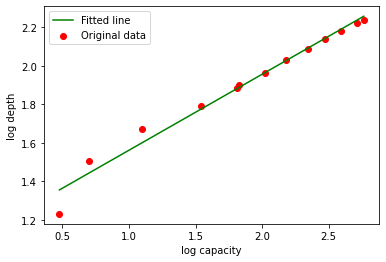

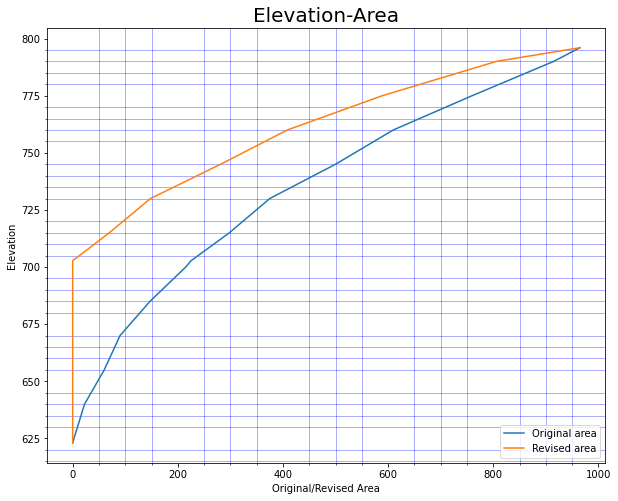

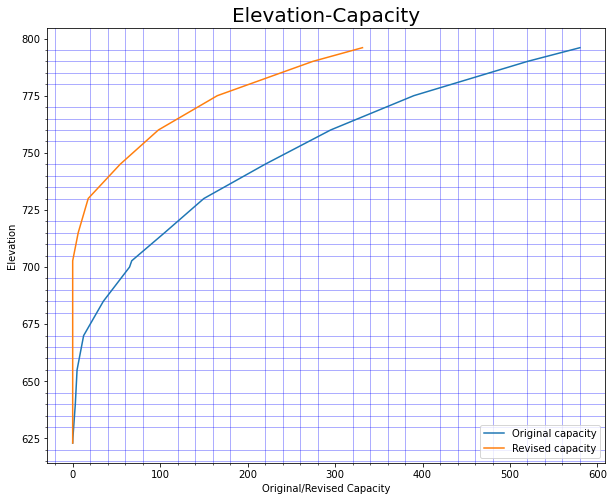

In [1]:
import numpy as np
import matplotlib.pyplot as plt
el=np.array([796,790,775,760,745,730,715,702.75,700,685,670,655,640,625,623])
or_ar=np.array([965,915,760,610,500,375,298,225,215,147,90,60,22.5,2.45,0.00])
#original capacity and depth data used as below.
or_cap=np.array([580,520,390,295,220,150,105,67.50,65,35,12.50,5,3,0.20,0])

print(len(el))
el_bl=623
el_frl=796
# total sediment volume t_sed in Mcum
t_sed=247

#river bed slope (rbs)
rbs=0.07
dep=np.subtract(el,el_bl)
print("depth",dep)
dep=np.array( [173,167,152,137,122,107,92,79.75,77,62,47,32,17,2,0])
#rel_dep=np.d [173,167,152,137,122,107,92,79.75,77,62,47,32,17,2,0ivide]
rel_dep=np.divide(dep,173)
print("relative depth",np.round(rel_dep,3))
rel_dep=np.array([1,0.965, 0.879, 0.792, 0.705, 0.618, 0.532, 0.461, 0.445, 0.358, 0.272, 0.185, 0.098, 0.012, 0])

or_ar=np.array([965,915,760,610,500,375,298,225,215,147,90,60,22.5,2.45,0.00])

print(len(or_ar))
#original capacity and depth data used as below.
or_cap=np.array([580,520,390,295,220,150,105,67.50,65,35,12.50,5,3,0.20,0])
dep=np.array( [173,167,152,137,122,107,92,79.75,77,62,47,32,17,2,0])
print(len(or_cap))

or_cap=np.array([580,520,390,295,220,150,105,67.50,65,35,12.50,5,3])
dep=np.array( [173,167,152,137,122,107,92,79.75,77,62,47,32,17]) 

#out_array = np.log10(in_array)
x= np.log10(or_cap)
#print("x",np.round(x,3))
y= np.log10(dep)
#print("y",np.round(y,3))
#plt.plot(x,y)
plt.scatter(x,y, color="red", marker="o", label="Original data")      
      
      
from scipy.stats import linregress
x= np.log10(or_cap)
y= np.log10(dep)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print("slope",slope) 
y_pred = intercept + slope*x
plt.plot(x,y_pred, color="green", label="Fitted line")     
m=np.divide(1,slope)
plt.legend(loc='best')
plt.xlabel('log capacity') 
plt.ylabel('log depth')
##########################################
plt.savefig("scipy-linregress.png")
print("1/slope",m)
#Ap=C*p**m(1-p)*n
#zero elevation assumed el_zer=702.74
el_zer=702.74
#corresponding area in ha from graph 
a_zer=225
#redep_zer is p
p=np.subtract(el_zer,el_bl)/173
p=0.461
#print("relative depth atel_bl(p) = ",np.round(redep_zer,3))
#reservoir belongs to catgory class II type
c= 2.3240
m=0.5
n=0.4 
Ap_p = c*p**0.5** (1-p)**0.4
Ap_p=2.324*p**0.5*(1-p)**0.4
print("Ap_p=",np.round(Ap_p,2))
rel_dep=1.23
#k=a_zer=225
k=np.divide(a_zer,Ap_p)
print("k=",np.round(k))
exponent=0.5
rel_dep=np.array([1,0.965, 0.879, 0.792, 0.705, 0.618, 0.532, 0.461, 0.445, 0.358, 0.272, 0.185, 0.098, 0.012, 0])
p1= np.power(rel_dep, exponent)
print("p1",p1)
p2=1-rel_dep
print("p2",p2)
p3=np.power(p2,0.4)
print("p3",p3)
Ap=2.324*p1*p3
print("Ap=",np.round(Ap,3))
#################################

Ap=np.array([0,0.597,0.936,1.104,1.197,1.243,1.251, 1.232, 1.225, 1.165, 1.068, 0.921,0.698,0.253,0])
sed_are=k*Ap
print("sediment area",np.round(sed_are,2))
sed_are=np.array([ 0,109,170.9,201.57,218.55,226.95,228.41,225,215,147,90,60,22.5,2.45,0.00])
sed_vol1= 0.0245
sed_vol2= 1.87125
sed_vol4= 11.625
sed_vol3= 33.8572

#######################################
sed_are=np.array([ 0,109,170.9,201.57,218.55,226.95,228.41,225,215,147,90,60,22.5,2.45,0.00])

#sed_are=np.array ([1.5,2.5,3.55])


sed_are=np.array([ 0,109,170.9,201.57,218.55,226.95,228.41,225,215,147,90,60,22.5,2.45,0.00])
sed_vol=np.array([0.0245,1.8725,6.1875,11.625,18.150,27.150,6.0280,27.6768,33.8572,33.1230,31.2361,27.7066,20.7988,3.2316])
#sed_vol=np.array([0.0245,1.8725,6.1875,11.625,18.150,27.150,6.0280,27.6768,33.8572,33.1230,31.2361,27.7066,20.7988,3.2316])
#sed_vol_ha=100*sed_vol
sed_cum_vol=np.cumsum(sed_vol)
print(sed_cum_vol)
#sed_cum_vol=np.array( [2.450000e-02 1.897000e+00 8.084500e+00 1.970950e+01 3.785950e+01
# 6.500950e+01 7.103750e+01 9.871430e+01 1.325715e+02 1.656945e+02
 #1.969306e+02 2.246372e+02 2.454360e+02 2.486676e+02])
sed_cum_vol=np.array([0.0245,1.897,8.0845,19.095,37.859,65.00,71.04,98.71,132.26,165.69,196.97,
                      224.64,245.47,248.67])

or_ar=np.array([965,915,760,610,500,375,298,225,215,147,90,60,22.5,2.45,0.00])
or_cap=np.array([580,520,390,295,220,150,105,67.50,65,35,12.50,5,3,0.20,0])

accu_sed_vol=np.array([248.67,245.47,224.64,196.97,165.69,132.26,98.71, 71.04,65,37.8,19.709,8.0845,1.897,0.0245,0])

mod_accsed_vol=np.array([248.67,245.47,224.64,196.97,165.69,132.26,98.71,71.04,65,35,12.50,5,3,0.20,0])

rev_are=np.subtract(or_ar,sed_are)
print("rev_are",rev_are)
rev_cap=np.subtract(or_cap,mod_accsed_vol)
print("rev_cap",rev_cap)
rev_are=np.array([965, 806,589.1,408.43,281.45,148.05,69.59,0,0,0,0,0,0,0,0])  

rev_cap=np.array([331.33, 274.53, 165.36,  98.03,  54.31,  17.74,6.29,0,0,0,0,0,0,0,0])

###################################################
fig, ax = plt.subplots(1, figsize=(10, 8))


plt.minorticks_on()
plt.grid(b=True, which='minor', color='blue', linestyle='-', alpha=0.4)     
ax.plot(or_ar,el,label="Original Area-Elevation")
ax.plot(rev_are,el,label="Revised Area-Elevation")
plt.title("Elevation-Area",fontsize=20)
plt.xlabel("Original/Revised Area")
plt.ylabel("Elevation")
plt.legend(["Original area", "Revised area"], loc ="lower right")

x=el=np.array([796,790,775,760,745,730,715,702.75,700,685,670,655,640,625,623])
y2=or_cap=np.array([580,520,390,295,220,150,105,67.50,65,35,12.50,5,3,0.20,0])
fig, ax = plt.subplots(1, figsize=(10, 8))
y3=np.array([331.33, 274.53, 165.36,  98.03,  54.31,  17.74,6.29,0,0,0,0,0,0,0,0])
#plt.grid(b=True, which='major', color='green', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='blue', linestyle='-', alpha=0.4)
plt.plot(y2,x)
plt.plot(y3,x)
plt.title("Elevation-Capacity",fontsize=20) 
plt.xlabel("Original/Revised Capacity")
plt.ylabel("Elevation")
plt.legend(["Original capacity", "Revised capacity"], loc ="lower right")

import pandas as pd
df= pd.DataFrame({'Elevation':el, 'Original Area':or_ar,'Ap':Ap,'Sediment Area':sed_are,'Sediment volume':accu_sed_vol,  'Sediment volume':accu_sed_vol,'Revised Area':rev_are,'Revised Capacity':rev_cap})

print(df)


















 